# Julia Package Exploration: Dynamical Systems

This notebook was prepared February 4, 2018 by Erin Brown at www.juliabox.com using Julia 0.6.2.

## About the Package
DynamicalSystems is a registered Julia package designed for the exploration of chaos and nonlinear dynamical systems. It is actually a suite of packages, and contains two registered Julia packages: 
* DynamicalSystemsBase
* ChaosTools
which we will explore in this notebook.

Package Source: https://github.com/JuliaDynamics/DynamicalSystems.jl

Documentation: https://juliadynamics.github.io/DynamicalSystems.jl/latest/

In [1]:
using DynamicalSystems
using PyPlot

### DynamicalSystemsBase

The DynamicalSystemsBase package contains a multitude of tools for defining, generating, and evolving dynamical systems, including both 
* Discrete maps, and 
* Continuous flows

It also includes a library of pre-defined commonly studied nonlinear dynamical systems.

### Pre-Defined Nonlinear Dynamical Systems
The library of pre-defined nonlinear dynamical systems that DynamicalSystemsBase provides includes one of my very favorite dynamical systems, the Rössler system. The Rössler system, given by the following set of coupled differential equations, was designed by Otto Rössler in 1976 who intended it to be an easier-to-study variation on the better known Lorenz system. 

Rössler System: \begin{cases}{\frac  {dx}{dt}}=-y-z\\{\frac  {dy}{dt}}=x+ay\\{\frac  {dz}{dt}}=b+z(x-c)\end{cases}

Using the library included in DynamicalSystemsBase, we can construct the Rössler system very simply as follows, providing only the desired parameters:

In [3]:
ds = Systems.roessler(a = 0.2, b = 0.2, c = 5.7);

We have constructed the Rössler dynamical system as type ContinuousDS <: DynamicalSystem. Once constructed, we can compute the trajectory of the system and plot the attractor in the $xy$-plane as follows:

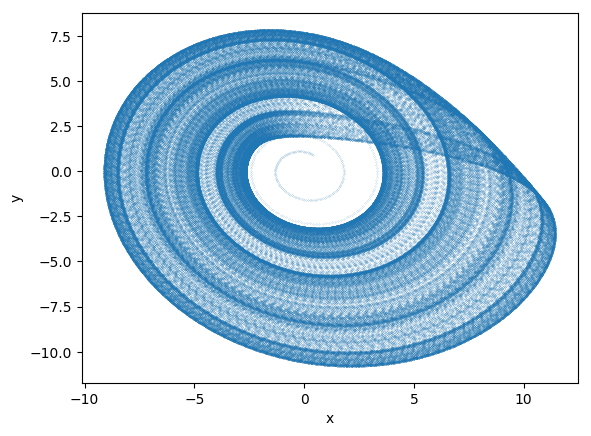

In [9]:
typeof(ds);
ts = trajectory(ds, 10000.0);
plot(ts[:, 1], ts[:, 2], lw = 0, marker ="o", ms = 0.1);
xlabel("x");
ylabel("y");

We can also construct the systems as ContinuousDS from scratch using the tools provided in DynamicalSystemsBase. For the sake of example, I show below how to do so with the Rössler system.

In [11]:
@inline @inbounds function roessler_eom(du, u, p, t)
    a, b, c = p
    du[1] = -u[2]-u[3]
    du[2] = u[1] + a*u[2]
    du[3] = b + u[3]*(u[1] - c)
    return nothing
end

@inline @inbounds function roessler_jacob(J, u, p, t)
    J[2,2] = p[1]
    J[3,1] = u[3]; J[3,3] = u[1] - p[3]
    return nothing
end

function roessler(u0=rand(3); a = 0.2, b = 0.2, c = 5.7)
    i = one(eltype(u0))
    o = zero(eltype(u0))
    J = zeros(eltype(u0), 3, 3)
    J[1,:] .= [o, -i,      -i]
    J[2,:] .= [i,  a,       o]
    J[3,:] .= [u0[3], o, u0[1] - c]

    return ContinuousDS(u0, roessler_eom, roessler_jacob, J; parameters = [a, b, c])
end

roessler (generic function with 2 methods)

You can see that this construction replicates that of the pre-defined library. I have executed the same commands as before to generate trajectory and plot the attractor below.

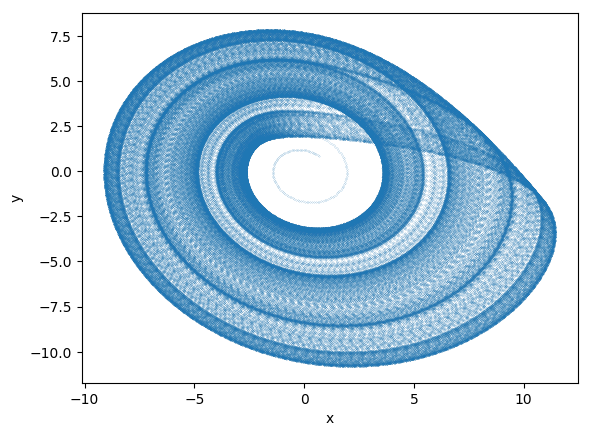

In [12]:
ds = roessler()
ts = trajectory(ds, 10000.0);
plot(ts[:, 1], ts[:, 2], lw = 0, marker ="o", ms = 0.1);
xlabel("x");
ylabel("y");

You can see by comparing the two plots that the attractor generated is the same.

While we have no need to generate the Rössler system from scratch algebraically, the library of pre-defined systems that DynamicalSystemsBase provides is understandably limited, and so this construction method is necessary for general dynamical systems.

### ChaosTools

ChaosTools is a powerful package that makes studying dynamical systems, once generated, quite easy. It provides capabilities for 
* Producing bifurcation diagrams and Poincare sections
* Computing important quantities such as Lyapunov exponents/spectra, fractal dimension, Renyi entropy, etc.
* Finding fixed points
* Detecting chaos
* Analyzing and reconstructing time series
* Much more!

Below I have demonstrated the use of ChaosTools for producing bifurcation diagrams from discrete maps. I have chosen to do so with the logistic map, constructing it from the DynamicalSystemsBase pre-defined systems library. Note that while the example below is specifically for a discrete map, the ChaosTools package also provides methods for producing bifurcation diagrams from continuous flows as well.

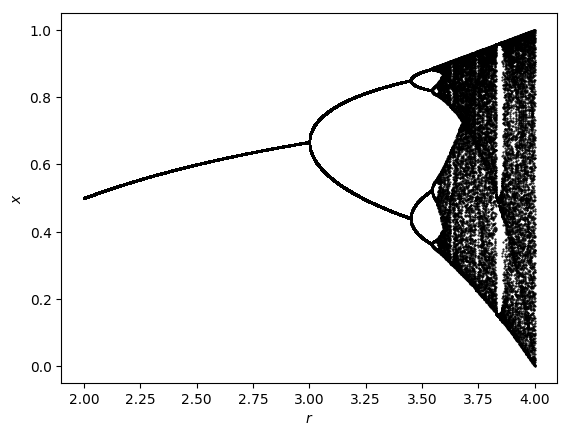

PyObject Text(24,0.5,u'$x$')

In [1]:
using DynamicalSystems
using PyPlot

ds = Systems.logistic()
i = 1
pvalues = 2:0.001:4
ics = [rand() for m in 1:10]
n = 50
Ttr = 5000
p_index = 1
output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr);

figure()
for (j, p) in enumerate(pvalues)
    plot(p .* ones(output[j]), output[j], lw = 0,
    marker = "o", ms = 0.5, color = "black")
end
xlabel("\$r\$"); ylabel("\$x\$")

For more information on the DynamicalSystems Julia package, check out the following:

* Package Source: https://github.com/JuliaDynamics/DynamicalSystems.jl
* Documentation: https://juliadynamics.github.io/DynamicalSystems.jl/latest/